## Evaluation of classified contacts between cones and bipolar cells
This notebook contains the code to reproduce all figures showing statistics about the cone-BC contacts

In [1]:
import numpy as np
from scipy.stats import itemfreq
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from sklearn import cross_validation
from sklearn import svm
from sklearn.decomposition import PCA
%matplotlib inline
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
matplotlib.rcParams.update({'mathtext.default': 'regular'})
matplotlib.rcParams.update({'font.size': 14})

In [2]:
sns.set_style("whitegrid")

In [3]:
BC_ids=np.loadtxt('data/BC_IDs_new').astype(int)

In [4]:
contact_summary=pd.read_pickle('data/cone_contact_predictions')

In [5]:
cut_off_cones=np.array([73,72,71,74,201,202,211,203,88,204,142,34,4,30,199])+2000
cones_outside_cbc9=np.array([193,209,200,198,197,199,73,72,71,74,69,67,66,211,86,88,87,120,85,204,84,207,128,114,126,127,125,142,130,104,106,175,135])+2000
BC_excluded=np.array([691,709,827,836])
blue_cones=np.array([2006,2007,2009,2024,2028,2029])

In [6]:
all_cones=np.unique(contact_summary['cone'].as_matrix())
green_cones=all_cones[(np.in1d(all_cones,blue_cones,invert=True))&(np.in1d(all_cones,cones_outside_cbc9,invert=True))]

In [7]:
true_contacts_green=contact_summary.ix[(contact_summary['prediction']==1)&(contact_summary['cone_type']=='green'),:4]
true_contacts_blue=contact_summary.ix[(contact_summary['prediction']==1)&(contact_summary['cone_type']=='blue'),:4]
true_contacts=contact_summary.ix[(contact_summary['prediction']==1)]

In [8]:
stat_bc_contacts_green=pd.DataFrame(BC_ids[(BC_ids[:,4]>=58)&(BC_ids[:,4]<=71)&np.in1d(BC_ids[:,0],BC_excluded,invert=True)][:,[0,4]],columns=['cell','type'])
stat_bc_contacts_blue=stat_bc_contacts_green.copy()
green_contact_freq_type=itemfreq(true_contacts_green['cell'].as_matrix())
for i in range(stat_bc_contacts_green.shape[0]):
    stat_bc_contacts_green.loc[i,'count']=0
    try:
        stat_bc_contacts_green.ix[i,'count']=green_contact_freq_type[green_contact_freq_type[:,0]==stat_bc_contacts_green.ix[i,'cell'],1]
    except ValueError:
        continue

blue_contact_freq_type=itemfreq(true_contacts_blue['cell'].as_matrix())

for i in range(stat_bc_contacts_blue.shape[0]):
    stat_bc_contacts_blue.loc[i,'count']=0
    try:
        stat_bc_contacts_blue.ix[i,'count']=blue_contact_freq_type[blue_contact_freq_type[:,0]==stat_bc_contacts_blue.ix[i,'cell'],1]
    except ValueError:
        continue

In [9]:
stat_bc_contacts_all=pd.DataFrame(BC_ids[(BC_ids[:,4]>=58)&(BC_ids[:,4]<=71)&np.in1d(BC_ids[:,0],BC_excluded,invert=True)][:,[0,4]],columns=['cell','type'])
all_contact_freq_type=itemfreq(true_contacts['cell'].as_matrix())
for i in range(stat_bc_contacts_all.shape[0]):
    stat_bc_contacts_all.loc[i,'count']=0
    try:
        stat_bc_contacts_all.ix[i,'count']=all_contact_freq_type[all_contact_freq_type[:,0]==stat_bc_contacts_all.ix[i,'cell'],1]
    except ValueError:
        continue
for i in range(stat_bc_contacts_all.shape[0]):
    stat_bc_contacts_all.loc[i,'count_rounded']=np.clip((stat_bc_contacts_all.ix[i,'count']+1)//2,0,4)

In [10]:
stat_cone_contacts_all=pd.DataFrame(np.concatenate((np.tile(all_cones,14).reshape(-1,1),np.repeat(np.arange(58,72),all_cones.shape[0]).reshape(-1,1)),axis=1),columns=['cone','type'])
for i in range(stat_cone_contacts_all.shape[0]):
    stat_cone_contacts_all.loc[i,'count']=np.sum((true_contacts['cone']==stat_cone_contacts_all.ix[i,'cone'])&\
                                                   (true_contacts['type']==stat_cone_contacts_all.ix[i,'type']))

In [11]:
stat_cone_contacts_green=pd.DataFrame(np.concatenate((np.tile(green_cones,14).reshape(-1,1),np.repeat(np.arange(58,72),green_cones.shape[0]).reshape(-1,1)),axis=1),columns=['cone','type'])
stat_cone_contacts_blue=pd.DataFrame(np.concatenate((np.tile(blue_cones,14).reshape(-1,1),np.repeat(np.arange(58,72),blue_cones.shape[0]).reshape(-1,1)),axis=1),columns=['cone','type'])

for i in range(stat_cone_contacts_green.shape[0]):
    stat_cone_contacts_green.loc[i,'count']=np.sum((true_contacts_green['cone']==stat_cone_contacts_green.ix[i,'cone'])&\
                                                   (true_contacts_green['type']==stat_cone_contacts_green.ix[i,'type']))
for i in range(stat_cone_contacts_blue.shape[0]):
    stat_cone_contacts_blue.loc[i,'count']=np.sum((true_contacts_blue['cone']==stat_cone_contacts_blue.ix[i,'cone'])&\
                                                   (true_contacts_blue['type']==stat_cone_contacts_blue.ix[i,'type']))

In [12]:
stat_cone_contacts_joined=pd.concat({'S-cones': stat_cone_contacts_blue, 'M-cones': stat_cone_contacts_green})
stat_cone_contacts_joined=stat_cone_contacts_joined.reset_index().drop('level_1',axis=1).rename(columns={'level_0':'cone_type'})

stat_bc_contacts_joined=pd.concat({'S-cones': stat_bc_contacts_blue, 'M-cones': stat_bc_contacts_green})
stat_bc_contacts_joined=stat_bc_contacts_joined.reset_index().drop('level_1',axis=1).rename(columns={'level_0':'cone_type'})

stat_cone_contacts_joined_no_rbc=stat_cone_contacts_joined[stat_cone_contacts_joined['type']!=71]
stat_bc_contacts_joined_no_rbc=stat_bc_contacts_joined[stat_bc_contacts_joined['type']!=71]

#### Contacted cones per bipolar cell (Figure3B)

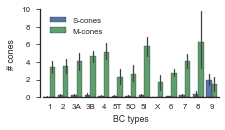

In [13]:
labels = ['1','2','3A','3B','4','5T','5O','5I','X','6','7','8','9']
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(8/2.54,4/2.54))
    ax=sns.barplot(x='type',y='count',data=stat_bc_contacts_joined_no_rbc,hue='cone_type',order=np.arange(58,71),hue_order=['S-cones','M-cones'],ci=95)
    ax.set_xticklabels(labels)
    ax.set(ylabel='# cones',ylim=(0,10),xlabel='BC types')
    ax.spines['left'].set_position(('outward',3))
    legend=plt.legend(loc='upper left')
    legend.get_title().set_fontsize(8)
    sns.despine()
#     plt.savefig('figures/joined_contacts_per_bc.svg',bbox_inches='tight',dpi=300)
    plt.show()

#### Contacted bipolar cells per cone (Figure 3D)

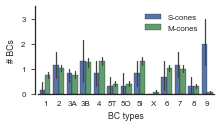

In [14]:
labels = ['1','2','3A','3B','4','5T','5O','5I','X','6','7','8','9']
sns.set(font='Arial',context='paper',style='white',rc={"xtick.major.size": 0, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(8/2.54,4/2.54))
    ax=sns.barplot(x='type',y='count',data=stat_cone_contacts_joined_no_rbc,hue='cone_type',order=np.arange(58,71),hue_order=['S-cones','M-cones'],ci=95)
    ax.set_xticklabels(labels)
    ax.set(ylabel='# BCs',xlabel='BC types',ylim=(0,3.5),yticks=[0,1,2,3])
    ax.spines['left'].set_position(('outward',3))
    legend=plt.legend(bbox_to_anchor=(0.95, 1))
    legend.get_title().set_fontsize(8)
    sns.despine()
#     plt.savefig('figures/joined_contacts_per_cone.svg',bbox_inches='tight',dpi=300)
    plt.show()

### Total number of contacted BC per cone

In [17]:
cone_means=np.loadtxt('data/cone_means_rot.txt')
central_cones=cone_means[(cone_means[:,2]>np.min(cone_means[:,2])+500)&(cone_means[:,2]<np.max(cone_means[:,2])-500)&\
                         (cone_means[:,3]>np.min(cone_means[:,3])+500)&(cone_means[:,3]<np.max(cone_means[:,3])-500),0]
print('Central S-cones:',np.sum(np.in1d(central_cones,blue_cones)))
print('Central M-cones:',np.sum(np.in1d(central_cones,green_cones)))

Central S-cones: 5
Central M-cones: 71


In [18]:
stat_overall_cone_contacts=pd.concat({'S cones':pd.DataFrame(blue_cones,columns=['cone']),'M cones':pd.DataFrame(green_cones,columns=['cone'])})
stat_overall_cone_contacts=stat_overall_cone_contacts.reset_index().drop('level_1',axis=1).rename(columns={'level_0':'cone_type'})
for i in range(stat_overall_cone_contacts.shape[0]):
    stat_overall_cone_contacts.loc[i,'count']=np.sum(true_contacts['cone']==stat_overall_cone_contacts.ix[i,'cone'])
for i in range(stat_overall_cone_contacts.shape[0]):
    stat_overall_cone_contacts.loc[i,'points']=np.sum(contact_summary[(contact_summary['cone']==stat_overall_cone_contacts.ix[i,'cone'])\
                                                                      &contact_summary['prediction']==1]['count'])
stat_overall_cone_contacts_central=stat_overall_cone_contacts[np.in1d(stat_overall_cone_contacts['cone'],central_cones)]

In [19]:
stat_overall_cone_contacts=pd.concat({'S cones':pd.DataFrame(blue_cones,columns=['cone']),'M cones':pd.DataFrame(green_cones,columns=['cone'])})
stat_overall_cone_contacts=stat_overall_cone_contacts.reset_index().drop('level_1',axis=1).rename(columns={'level_0':'cone_type'})
for i in range(stat_overall_cone_contacts.shape[0]):
    stat_overall_cone_contacts.loc[i,'count']=np.sum(true_contacts['cone']==stat_overall_cone_contacts.ix[i,'cone'])
    stat_overall_cone_contacts.loc[i,'count_on']=np.sum(true_contacts[true_contacts['type']>62]['cone']==stat_overall_cone_contacts.ix[i,'cone'])
    stat_overall_cone_contacts.loc[i,'count_off']=np.sum(true_contacts[true_contacts['type']<63]['cone']==stat_overall_cone_contacts.ix[i,'cone'])
for i in range(stat_overall_cone_contacts.shape[0]):
    stat_overall_cone_contacts.loc[i,'points']=np.sum(contact_summary[(contact_summary['cone']==stat_overall_cone_contacts.ix[i,'cone'])\
                                                                      &contact_summary['prediction']==1]['count'])
    stat_overall_cone_contacts.loc[i,'points_on']=np.sum(contact_summary[(contact_summary['cone']==stat_overall_cone_contacts.ix[i,'cone'])\
                                                                      &(contact_summary['prediction']==1)&(contact_summary['type']>62)]['count'])
    stat_overall_cone_contacts.loc[i,'points_off']=np.sum(contact_summary[(contact_summary['cone']==stat_overall_cone_contacts.ix[i,'cone'])\
                                                                      &(contact_summary['prediction']==1)&(contact_summary['type']<63)]['count'])
stat_overall_cone_contacts_central=stat_overall_cone_contacts[np.in1d(stat_overall_cone_contacts['cone'],central_cones)]

In [20]:
print('Average number of contacted BC per M-cone (center):',\
      np.mean(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='M cones']['count']),\
      np.std(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='M cones']['count'])\
      /np.sqrt(np.sum(stat_overall_cone_contacts_central['cone_type']=='M cones')-1))
print('Average number of contacted BC per S-cone (center):',\
      np.mean(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='S cones']['count']),\
      np.std(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='S cones']['count'])\
      /np.sqrt(np.sum(stat_overall_cone_contacts_central['cone_type']=='S cones')-1))

print('Average number of contact points per M-cone (center):',\
      np.mean(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='M cones']['points']),\
      np.std(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='M cones']['points'])\
      /np.sqrt(np.sum(stat_overall_cone_contacts_central['cone_type']=='M cones')-1))
print('Average number of contact points per S-cone (center):',\
      np.mean(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='S cones']['points']),\
      np.std(stat_overall_cone_contacts_central[stat_overall_cone_contacts_central['cone_type']=='S cones']['points'])\
      /np.sqrt(np.sum(stat_overall_cone_contacts_central['cone_type']=='S cones')-1))

Average number of contacted BC per M-cone (center): 12.2112676056 0.394588899464
Average number of contacted BC per S-cone (center): 12.2 1.52970585408
Average number of contact points per M-cone (center): 105.323943662 4.78893655619
Average number of contact points per S-cone (center): 108.8 24.4834638072


### Alternative S-cone selection

In [21]:
blue_cones_alt=np.array([2007,2006,2010,2029,2061,2009,2031,2014,2024,2023,2100,2028,2017,2090])
green_cones_alt=all_cones[(np.in1d(all_cones,blue_cones_alt,invert=True))&(np.in1d(all_cones,cones_outside_cbc9,invert=True))]

contact_summary_alt=contact_summary.copy()
for i in range(contact_summary.shape[0]):
    if contact_summary_alt.ix[i,'cone'] in blue_cones_alt:
        contact_summary_alt.loc[i,'cone_type']='S-cone'
    elif contact_summary_alt.ix[i,'cone'] in green_cones_alt:
        contact_summary_alt.loc[i,'cone_type']='M-cone'
    else:
        contact_summary_alt.loc[i,'cone_type']='outside'
        
true_contacts_green_alt=contact_summary_alt.ix[(contact_summary_alt['prediction']==1)&(contact_summary_alt['cone_type']=='M-cone'),:4]
true_contacts_blue_alt=contact_summary_alt.ix[(contact_summary_alt['prediction']==1)&(contact_summary_alt['cone_type']=='S-cone'),:4]

In [22]:
stat_bc_contacts_green_alt=pd.DataFrame(BC_ids[(BC_ids[:,4]>=58)&(BC_ids[:,4]<=71)&np.in1d(BC_ids[:,0],BC_excluded,invert=True)][:,[0,4]],columns=['cell','type'])
stat_bc_contacts_blue_alt=stat_bc_contacts_green_alt.copy()
green_contact_freq_type_alt=itemfreq(true_contacts_green_alt['cell'].as_matrix())
for i in range(stat_bc_contacts_green_alt.shape[0]):
    stat_bc_contacts_green_alt.loc[i,'count']=0
    try:
        stat_bc_contacts_green_alt.ix[i,'count']=green_contact_freq_type_alt[green_contact_freq_type_alt[:,0]==stat_bc_contacts_green_alt.ix[i,'cell'],1]
    except ValueError:
        continue

blue_contact_freq_type_alt=itemfreq(true_contacts_blue_alt['cell'].as_matrix())
for i in range(stat_bc_contacts_blue_alt.shape[0]):
    stat_bc_contacts_blue_alt.loc[i,'count']=0
    try:
        stat_bc_contacts_blue_alt.ix[i,'count']=blue_contact_freq_type_alt[blue_contact_freq_type_alt[:,0]==stat_bc_contacts_blue_alt.ix[i,'cell'],1]
    except ValueError:
        continue
        
stat_cone_contacts_green_alt=pd.DataFrame(np.concatenate((np.tile(green_cones_alt,14).reshape(-1,1),np.repeat(np.arange(58,72),green_cones_alt.shape[0]).reshape(-1,1)),axis=1),columns=['cone','type'])
stat_cone_contacts_blue_alt=pd.DataFrame(np.concatenate((np.tile(blue_cones_alt,14).reshape(-1,1),np.repeat(np.arange(58,72),blue_cones_alt.shape[0]).reshape(-1,1)),axis=1),columns=['cone','type'])

for i in range(stat_cone_contacts_green_alt.shape[0]):
    stat_cone_contacts_green_alt.loc[i,'count']=np.sum((true_contacts_green_alt['cone']==stat_cone_contacts_green_alt.ix[i,'cone'])&\
                                                   (true_contacts_green_alt['type']==stat_cone_contacts_green_alt.ix[i,'type']))
for i in range(stat_cone_contacts_blue_alt.shape[0]):
    stat_cone_contacts_blue_alt.loc[i,'count']=np.sum((true_contacts_blue_alt['cone']==stat_cone_contacts_blue_alt.ix[i,'cone'])&\
                                                   (true_contacts_blue_alt['type']==stat_cone_contacts_blue_alt.ix[i,'type']))
    
stat_cone_contacts_joined_alt=pd.concat({'S-cones': stat_cone_contacts_blue_alt, 'M-cones': stat_cone_contacts_green_alt})
stat_cone_contacts_joined_alt=stat_cone_contacts_joined_alt.reset_index().drop('level_1',axis=1).rename(columns={'level_0':'cone_type'})

stat_bc_contacts_joined_alt=pd.concat({'S-cones': stat_bc_contacts_blue_alt, 'M-cones': stat_bc_contacts_green_alt})
stat_bc_contacts_joined_alt=stat_bc_contacts_joined_alt.reset_index().drop('level_1',axis=1).rename(columns={'level_0':'cone_type'})

stat_cone_contacts_joined_no_rbc_alt=stat_cone_contacts_joined_alt[stat_cone_contacts_joined_alt['type']!=71]
stat_bc_contacts_joined_no_rbc_alt=stat_bc_contacts_joined_alt[stat_bc_contacts_joined_alt['type']!=71]

#### Contacted cones per bipolar cell (alternative S-cone selection, supp. figure 5B)

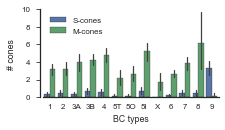

In [23]:
#alternativ blue cone selection
labels = ['1','2','3A','3B','4','5T','5O','5I','X','6','7','8','9']
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(8/2.54,4/2.54))
    ax=sns.barplot(x='type',y='count',data=stat_bc_contacts_joined_no_rbc_alt,hue='cone_type',order=np.arange(58,71),hue_order=['S-cones','M-cones'],ci=95)
    ax.set_xticklabels(labels)
    ax.set(ylabel='# cones',ylim=(0,10),xlabel='BC types')
    ax.spines['left'].set_position(('outward',3))
    legend=plt.legend(loc='upper left')
    legend.get_title().set_fontsize(8)
    sns.despine()
#     plt.savefig('figures/joined_contacts_per_bc_alternative.svg',bbox_inches='tight',dpi=300)
    plt.show()

#### Contacted bipolar cells per cone (alternative S-cone selection, supp. figure 5C)

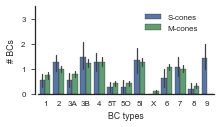

In [24]:
#alternativ blue cone selection
labels = ['1','2','3A','3B','4','5T','5O','5I','X','6','7','8','9']
sns.set(font='Arial',context='paper',style='white',rc={"xtick.major.size": 0, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(8/2.54,4/2.54))
    ax=sns.barplot(x='type',y='count',data=stat_cone_contacts_joined_no_rbc_alt,hue='cone_type',order=np.arange(58,71),hue_order=['S-cones','M-cones'],ci=95)
    ax.set_xticklabels(labels)
    ax.set(ylabel='# BCs',xlabel='BC types',ylim=(0,3.5),yticks=[0,1,2,3])
    ax.spines['left'].set_position(('outward',3))
    legend=plt.legend(bbox_to_anchor=(0.95, 1))
    legend.get_title().set_fontsize(8)
    sns.despine()
#     plt.savefig('figures/joined_contacts_per_cone_alternative.svg',bbox_inches='tight',dpi=300)
    plt.show()

### Contacts between rod bipolar cells and cones

#### Contacted cones per rod bipolar cell (Figure 5C)

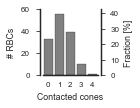

In [25]:
plt.figure(figsize=(2.5/2.54,3/2.54))
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
ax=sns.countplot(x='count',data=stat_bc_contacts_all[stat_bc_contacts_all['type']==71],order=np.arange(0,5),color='grey')
ncount=len(stat_bc_contacts_all[stat_bc_contacts_all['type']==71]['cell'])
ax.set(xlabel='Contacted cones',ylabel='# RBCs',yticks=([0,20,40,60]))
ax2=ax.twinx()
ax2.set(ylim=([0,ax.get_ylim()[1]/ncount*100]),yticks=[0,10,20,30,40],yticklabels=['0','10','20','30','40'],ylabel='Fraction [%]')
ax.spines['left'].set_position(('outward',3))
ax.spines['right'].set_position(('outward',3))
ax2.spines['left'].set_position(('outward',3))
ax2.spines['right'].set_position(('outward',3))
sns.despine(right=False)
# plt.savefig('figures/rbc_contacts_per_bc.svg',bbox_inches='tight',dpi=300)
plt.show()

#### Color selectivity of rod bipolar cells (Figure 5D)

In [26]:
print('RBC - M cone contacts:',np.sum(stat_bc_contacts_joined[(stat_bc_contacts_joined['type']==71)&(stat_bc_contacts_joined['cone_type']=='M-cones')]['count']))
print('RBC - S cone contacts:',np.sum(stat_bc_contacts_joined[(stat_bc_contacts_joined['type']==71)&(stat_bc_contacts_joined['cone_type']=='S-cones')]['count']))
print('RBC contacts per M cone:',np.mean(stat_cone_contacts_joined[(stat_cone_contacts_joined['type']==71)&(stat_cone_contacts_joined['cone_type']=='M-cones')]['count']))
print('RBC contacts per S cone:',np.mean(stat_cone_contacts_joined[(stat_cone_contacts_joined['type']==71)&(stat_cone_contacts_joined['cone_type']=='S-cones')]['count']))

RBC - M cone contacts: 151.0
RBC - S cone contacts: 7.0
RBC contacts per M cone: 1.27966101695
RBC contacts per S cone: 1.16666666667


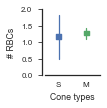

In [27]:
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(2.5/2.54,3/2.54))
    ax=sns.pointplot(x='cone_type',y='count',data=stat_cone_contacts_joined[(stat_cone_contacts_joined['type']==71)],order=['S-cones','M-cones'],ci=95,\
                     linestyles='',markers='s',palette=sns.color_palette(),scale=1.5)
    ax.set(ylabel='# RBCs',ylim=(0,2),xlabel='Cone types',xticklabels=['S','M'])
    ax.spines['left'].set_position(('outward',3))
    sns.despine()
#     plt.savefig('figures/rbc_color_selectivity.svg',bbox_inches='tight',dpi=300)
    plt.show()

#### Contacted rod bipolar cells per cone (Figure 5E)

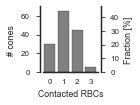

In [28]:
plt.figure(figsize=(2.5/2.54,3/2.54))
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
ax=sns.countplot(x='count',data=stat_cone_contacts_all[stat_cone_contacts_all['type']==71],order=np.arange(0,4),color='grey')
ncount=len(stat_cone_contacts_all[stat_cone_contacts_all['type']==71]['cone'])
ax.set(xlabel='Contacted RBCs',ylabel='# cones',yticks=([0,20,40,60]))
ax2=ax.twinx()
ax2.set(ylim=([0,ax.get_ylim()[1]/ncount*100]),yticks=[0,10,20,30,40],yticklabels=['0','10','20','30','40'],ylabel='Fraction [%]')
ax.spines['left'].set_position(('outward',3))
ax.spines['right'].set_position(('outward',3))
ax2.spines['left'].set_position(('outward',3))
ax2.spines['right'].set_position(('outward',3))
sns.despine(right=False)
# plt.savefig('figures/rbc_contacts_per_cone.svg',bbox_inches='tight',dpi=300)
plt.show()